In [1]:
import sklearn
import itertools
from sklearn.svm import SVC
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
train_data,test_data, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size = 0.25, random_state = 7)

In [4]:
print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)

(52500, 784) (52500,)
(17500, 784) (17500,)


In [5]:
# printing to see what an image looks like
print(train_data[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  76
 175 190 205 180 175 140  23   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 255 195 142 142 142  99 222 111   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255  63   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  70 241   8   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  80 239   0   0   0   0   0   0   0   0   

In [6]:
# printing labels

print(train_label)

[ 5.  3.  3. ...,  8.  9.  1.]


<b> Building the classifier

In [7]:
clf = sklearn.linear_model.SGDClassifier()

In [8]:
clf.fit(train_data,train_label)

/Users/Maverick/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [9]:
preds = clf.predict(test_data)

In [10]:
acc = (preds == test_label).astype(int).sum()/len(test_label)*100
print(f"Accuracy of Linear SVM on the test data is {acc:.2f}%")

Accuracy of Linear SVM on the test data is 87.82%


<b> Trying it with SVC on a sample of data

In [30]:
batchSize = 4
def imgshow(images,labels = None):
    fig = plt.figure(figsize = (10,10))
    for i in range(batchSize):
        ax = plt.subplot(1,batchSize,i+1)
        plt.imshow(images[i],cmap = 'gray')
        plt.axis('off')
        if labels is not None:
            plt.title(int(labels[i]))
    

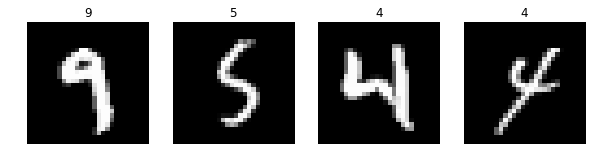

In [38]:
# Displaying some random images
random_indices = np.random.choice(range(len(train_data)),4, replace  = False)
random_indices
imgshow(train_data[random_indices].reshape(len(random_indices),28,28),train_label[random_indices])

In [41]:
# Getting sample data

random_indices = np.random.choice(range(len(train_data)),20000, replace  = False)
sample_train_data = train_data[random_indices]
sample_train_label = train_label[random_indices]

In [47]:
C_range = [0.01,1,100]
kernels = ['rbf','linear']
results_acc = {}
results_preds = {}

In [48]:
for C in C_range:
    for k in kernels:
        print(f'Running {C} and {k}')
        clf = SVC(C = C, kernel = k, random_state=7) 
        clf.fit(sample_train_data,sample_train_label)
        predictions = clf.predict(test_data)
        accuracy = (predictions == test_label).astype(int).sum()/len(test_label)*100
        key_val = (C,k)
        results_acc[key_val] = accuracy
        results_preds[key_val] = predictions

Running 0.01 and rbf
Running 0.01 and linear
Running 1 and rbf
Running 1 and linear
Running 100 and rbf
Running 100 and linear


In [49]:
results_acc

{(0.01, 'rbf'): 11.194285714285716,
 (0.01, 'linear'): 90.885714285714286,
 (1, 'rbf'): 11.194285714285716,
 (1, 'linear'): 90.885714285714286,
 (100, 'rbf'): 11.194285714285716,
 (100, 'linear'): 90.885714285714286}

From these results we see that the value of C doesn't really have any effect on the results. So we can choose C to be default value of 1 and use linear kernel. 


In [57]:
acc = results_acc[(1, 'linear')]
print(f'The accuracy of Linear Kernel with C = 1 on test data: {acc:.2f}%')

The accuracy of Linear Kernel with C = 1 on test data: 90.89%


In [59]:
preds = results_preds[(1,'linear')]

<b> Getting the confusion Matrix

In [58]:
#Plotting confusion matrix

def plot_conf_matrix(cnf_mat,classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cnf_mat = cnf_mat.astype('float')/cnf_mat.sum(axis = 1)
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
    
    plt.imshow(cnf_mat, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tickmarks = np.arange(len(classes))
    plt.xticks(tickmarks,classes, rotation = 45)
    plt.yticks(tickmarks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cnf_mat.max()/2
    for i,j in itertools.product(range(cnf_mat.shape[0]), range(cnf_mat.shape[1])):
        plt.text(j,i, format(cnf_mat[i,j],fmt), horizontalalignment = "center", 
                color = "white" if cnf_mat[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    

In [64]:
conf_matrix = confusion_matrix(test_label,preds)

In [65]:
conf_matrix

array([[1700,    0,    3,    3,    5,   13,   10,    0,    8,    1],
       [   0, 1926,    8,    4,    1,    3,    2,    2,   10,    3],
       [  20,   26, 1627,   22,   19,    6,   17,   24,   36,    4],
       [  14,   16,   45, 1562,    2,   77,    6,   10,   37,   15],
       [   2,   13,   23,    1, 1581,    1,   12,   12,    3,   60],
       [  19,   16,   24,   92,   13, 1333,   17,    2,   32,   10],
       [  12,    4,   38,    0,    9,   24, 1624,    0,    4,    0],
       [  10,   15,   30,   17,   13,    4,    2, 1676,    7,   73],
       [  11,   30,   48,   77,   12,   48,   11,    8, 1363,   15],
       [  11,    7,   20,   25,   86,    9,    1,   78,   12, 1513]])

Confusion Matrix without normalization


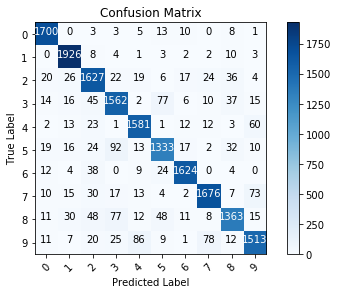

In [68]:
plot_conf_matrix(conf_matrix,list(range(10)),False)